In [1]:
import pandas as pd

data = pd.read_csv("rl_simple.csv")

data.head()

,Hogar,Nº de integrantes del grupo familiar,Gastos en alimentación (miles de pesos)
0,1,4,200
1,2,2,130
2,3,5,190
3,4,3,175
4,5,3,160


In [2]:
# Separamos las variables X e Y

from sklearn.linear_model import LinearRegression 

X = data[["Nº de integrantes del grupo familiar"]] # Variable independiente
y = data["Gastos en alimentación (miles de pesos)"] # Variable dependiente

In [3]:
# Crear el modelo de regresión lineal

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [4]:
# Hacer predicciones
y_pred = model.predict(X)
y_pred

array([188.33333333, 136.66666667, 214.16666667, 162.5       ,
       162.5       , 240.        , 162.5       , 188.33333333,
       188.33333333, 162.5       , 214.16666667])

In [5]:
# Creamos una columna aparte con las predicciones

data["Predicción"] = model.predict(X)
data.head()

,Hogar,Nº de integrantes del grupo familiar,Gastos en alimentación (miles de pesos),Predicción
0,1,4,200,188.333333
1,2,2,130,136.666667
2,3,5,190,214.166667
3,4,3,175,162.500000
4,5,3,160,162.500000


In [6]:
# Obtenemos los valores de b0 (Intercepto) y b1 (Coeficiente de la variable X)

intercepto = model.intercept_
coeficiente =  model.coef_[0]

print("Intercepto:", model.intercept_)
print("Coeficiente:", model.coef_[0])


Intercepto: 84.99999999999996
Coeficiente: 25.83333333333334


In [7]:
# y = b0 + b1*x1
# y = 85 + 25.833*3 

prediccion_simple = intercepto + coeficiente*3
prediccion_simple

162.49999999999997

In [8]:
# Mostrar las métricas de evaluación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas de evaluación
r2 = r2_score(y, data["Predicción"])
mae = mean_absolute_error(y, data["Predicción"])
mse = mean_squared_error(y, data["Predicción"])
rmse = mean_squared_error(y, data["Predicción"], squared=False)

# Mostrar las métricas de evaluación
print("R2:", r2)       # Mide la proporción de variación explicada por el modelo
print("MAE:", mae)      # Mide el promedio de los errores absolutos
print("MSE:", mse)      # Mide el promedio de los errores al cuadrado
print("RMSE:", rmse)    # Mide la raíz cuadrada del promedio de los errores al cuadrado


R2: 0.8422731734679569
MAE: 10.75757575757575
MSE: 154.9242424242423
RMSE: 12.44685672867822


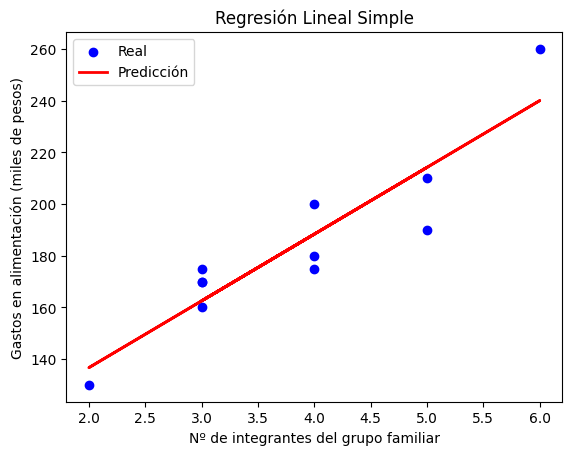

In [9]:
# Graficar los datos y la línea de regresión

import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label="Real")
plt.plot(X, data["Predicción"], color='red', linewidth=2, label="Predicción")
plt.title("Regresión Lineal Simple")
plt.xlabel("Nº de integrantes del grupo familiar")
plt.ylabel("Gastos en alimentación (miles de pesos)")
plt.legend()
plt.show()